In [1]:
print("Hello World")

Hello World


In [23]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [24]:
df = pd.read_csv('customer Segmentation export 2025-08-04 10-15-08.csv')

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [26]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [27]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [28]:
#Step 3: Preprocess the Data

# Drop columns not needed for clustering
df_clean = df.drop(columns=['CustomerID', 'Profession'])

# Encode categorical data (Gender)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

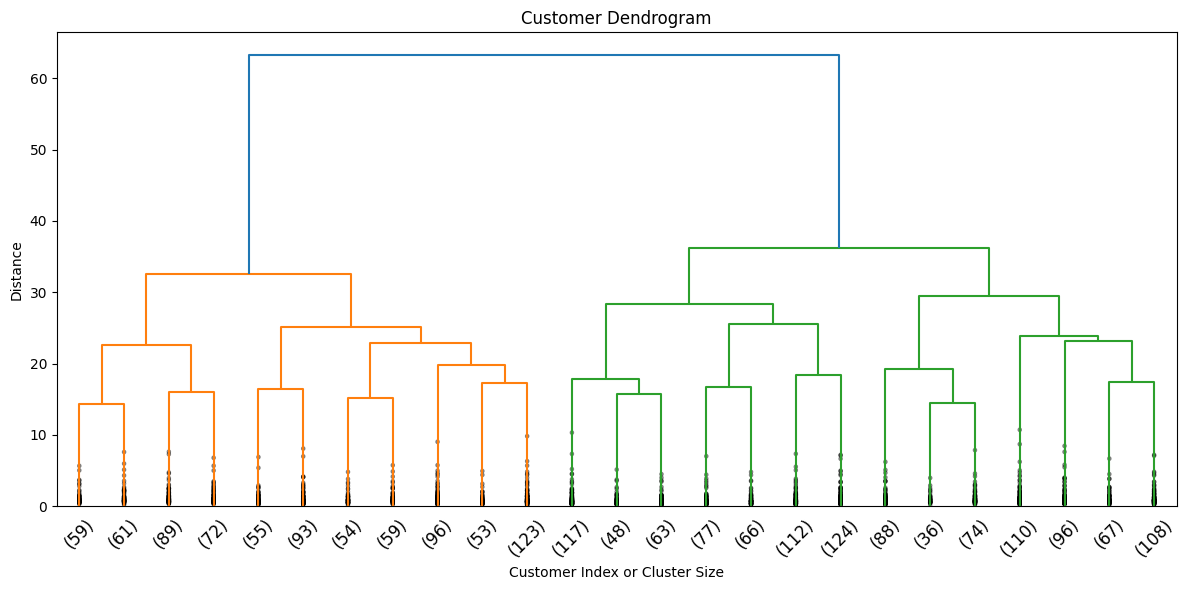

In [29]:
#Step 4: Create Dendrogram to Determine Optimal Clusters

# Generate linkage matrix
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=25, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Customer Dendrogram')
plt.xlabel('Customer Index or Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [32]:
#Step 5: Apply Agglomerative Clustering

# Apply clustering (you can change n_clusters based on dendrogram)
n_clusters = 5
agglo = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster'] = agglo.fit_predict(df_scaled)

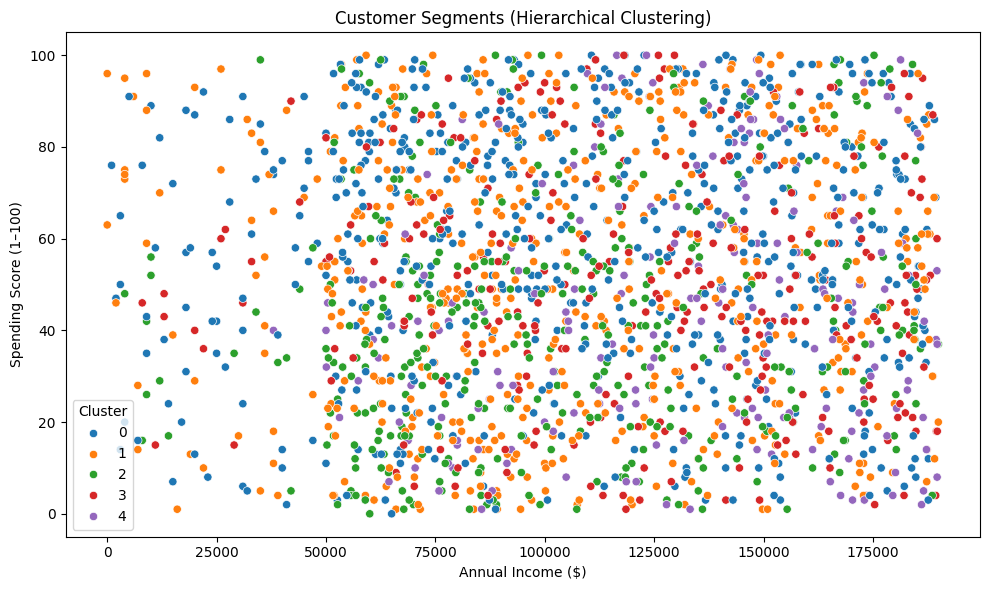

In [33]:
#Step 6: Visualize the Clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [34]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

          CustomerID        Age  Annual Income ($)  Spending Score (1-100)  \
Cluster                                                                      
0         894.802306  49.616145      108247.293245               58.336079   
1         960.285178  46.936210      105116.303940               51.309568   
2        1103.727034  60.595801      104475.643045               42.916010   
3        1085.903915  53.377224      122135.042705               50.252669   
4        1112.949495  23.737374      129320.095960               43.914141   

         Work Experience  Family Size  
Cluster                                
0               1.942339     2.957166  
1               2.007505     3.928705  
2               7.233596     4.013123  
3               8.359431     3.466192  
4               4.297980     5.782828  


In [35]:
print(df.groupby('Cluster')['Gender'].value_counts())

Cluster  Gender
0        Female    607
1        Male      533
2        Female    381
3        Male      281
4        Female    198
Name: count, dtype: int64


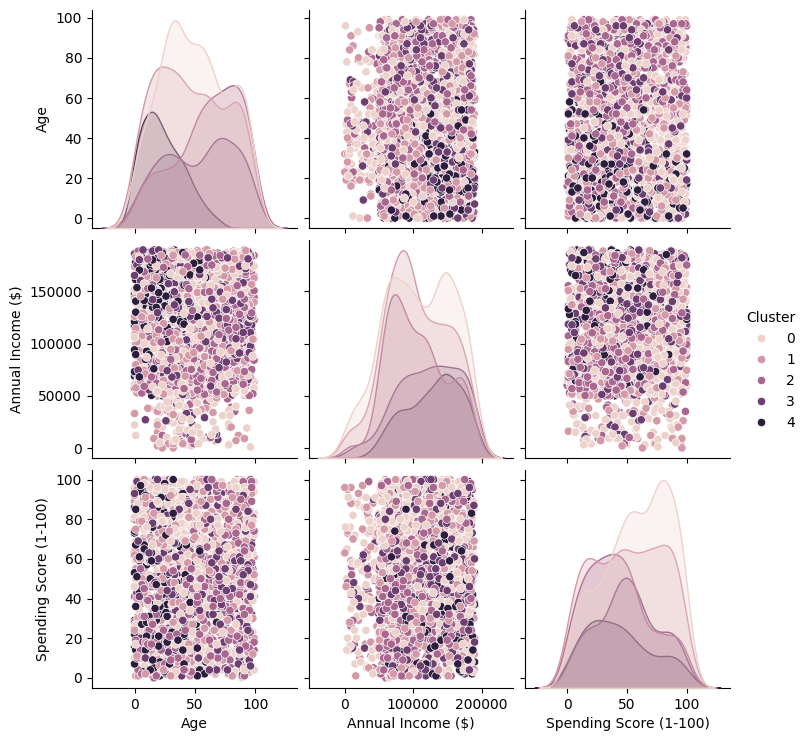

In [36]:
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income ($)', 'Spending Score (1-100)'])
plt.show()

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

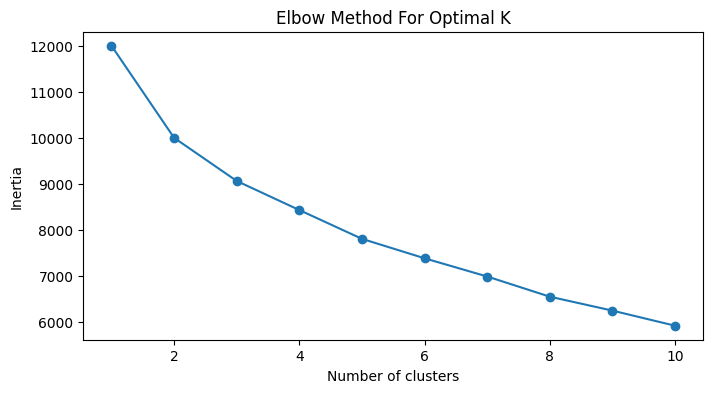

In [39]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


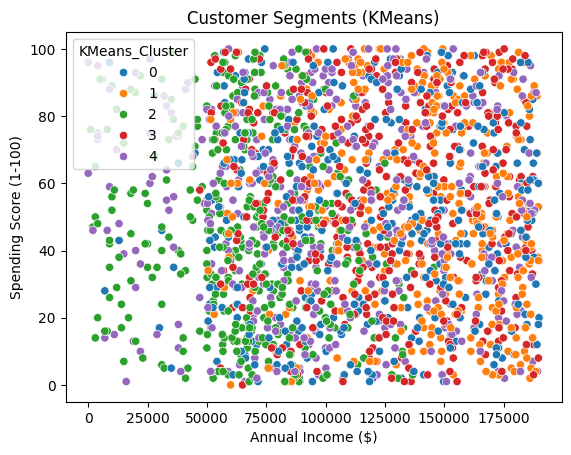

In [40]:
#Step 3: Visualize KMeans Clusters

sns.scatterplot(data=df, x='Annual Income ($)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='tab10')
plt.title('Customer Segments (KMeans)')
plt.show()

In [42]:
#Step-by-Step: DBSCAN Clustering
#Step 1: Import & Apply DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)  # tweak these params
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

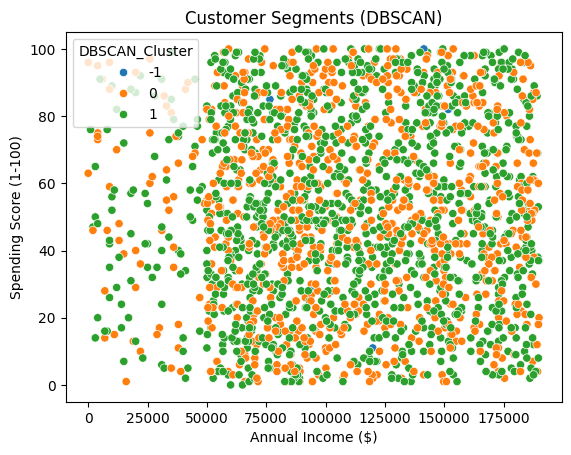

In [43]:
#Step 2: Visualize DBSCAN Results

sns.scatterplot(data=df, x='Annual Income ($)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='tab10')
plt.title('Customer Segments (DBSCAN)')
plt.show()